In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv("D:\\python\\house-prices-advanced-regression-techniques\\train.csv")
df_test = pd.read_csv("D:\\python\\house-prices-advanced-regression-techniques\\test.csv")

In [3]:
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

In [4]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     1680   Pave   NaN      Reg   
12    1473         160       RM         21.0     1680   Pave   NaN      Reg   
13    1474         160       RL         24.0     2280   Pave   NaN      Reg   
14    1475         120       RL         24.0     2280   Pave   NaN      Reg   
15    1476          60       RL        102.0    12858   Pave   NaN      IR1   
16    1477          20       RL         94.0    12883   Pave   NaN      IR1   
17    1478          20       RL         90.0    11520   Pave   NaN      Reg   
18    1479          20       RL         79.0    14122   Pave   NaN      IR1   
19    1480          20       RL        110.0    14300   Pave   NaN      Reg   
20    1481          60       RL        105.0    13650   Pave   NaN      Reg   
21    1482         120       RL         41.0     7132   Pave   NaN      IR1   
22    1483          20       RL        100.0    18494   Pave   NaN      IR1   
23    1484         120       RL         43.0     3203   Pave   NaN      Reg   
24    1485          80       RL         67.0    13300   Pave   NaN      IR1   
25    1486          60       RL         63.0     8577   Pave   NaN      IR1   
26    1487          60       RL         60.0    17433   Pave   NaN      IR2   
27    1488          20       RL         73.0     8987   Pave   NaN      Reg   
28    1489          20       FV         92.0     9215   Pave   NaN      Reg   
29    1490          20       FV         84.0    10440   Pave   NaN      Reg   
30    1491          60       RL         70.0    11920   Pave   NaN      Reg   
31    1492          30       RH         70.0     9800   Pave   NaN      Reg   
32    1493          20       RL         39.0    15410   Pave   NaN      IR1   
33    1494          60       RL         85.0    13143   Pave   NaN      IR1   
34    1495          60       RL         88.0    11134   Pave   NaN      Reg   
35    1496         120       FV         25.0     4835   Pave   NaN      IR1   
36    1497         160       FV         39.0     3515   Pave  Pave      Reg   
37    1498         160       FV         30.0     3215   Pave  Pave      Reg   
38    1499         160       FV         24.0     2544   Pave  Pave      Reg   
39    1500         160       FV         24.0     2544   Pave  Pave      Reg   
40    1501         160       FV          NaN     2980   Pave   NaN      Reg   
41    1502         160       FV          NaN     2403   Pave   NaN      IR1   
42    1503          20       FV         57.0    12853   Pave  Pave      IR1   
43    1504          60       FV         68.0     7379   Pave   NaN      IR1   
44    1505          20       FV         80.0     8000   Pave   NaN      Reg   
45    1506          20       RL          NaN    10456   Pave   NaN      IR1   
46    1507          60       RL         80.0    10791   Pave   NaN      Reg   
47    1508          50       RL          NaN    18837   Pave   NaN      IR1   
48    1509          60       RL         80.0     9600   Pave   NaN      Reg   
49    1510          20       RL         80.0     9600   Pa

In [7]:
df = pd.concat([df_train,df_test])
df.shape



(2919, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
 # Alley, FireplaceQu ,PoolQC,Fence,MiscFeature


In [10]:
int_features= df.select_dtypes(include=['int64']).columns
print('Total number in integer feature :', int_features.shape[0])
print('Integer features name:',int_features.to_list())

Total number in integer feature : 26
Integer features name: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
float_features= df.select_dtypes(include=['float64']).columns
print('Total number in Float feature :', float_features.shape[0])
print('FLoat features name:',float_features.to_list())

Total number in Float feature : 12
FLoat features name: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [12]:
cat_features= df.select_dtypes(include=['object']).columns
print('Total number in Object feature :', cat_features.shape[0])
print('Object features name:',cat_features.to_list())

Total number in Object feature : 43
Object features name: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [13]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [14]:
missing_value_count = df.isnull().sum()
missing_value_count

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [15]:
missing_value_percent = df.isnull().sum()/df.shape[0]*100
missing_value_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

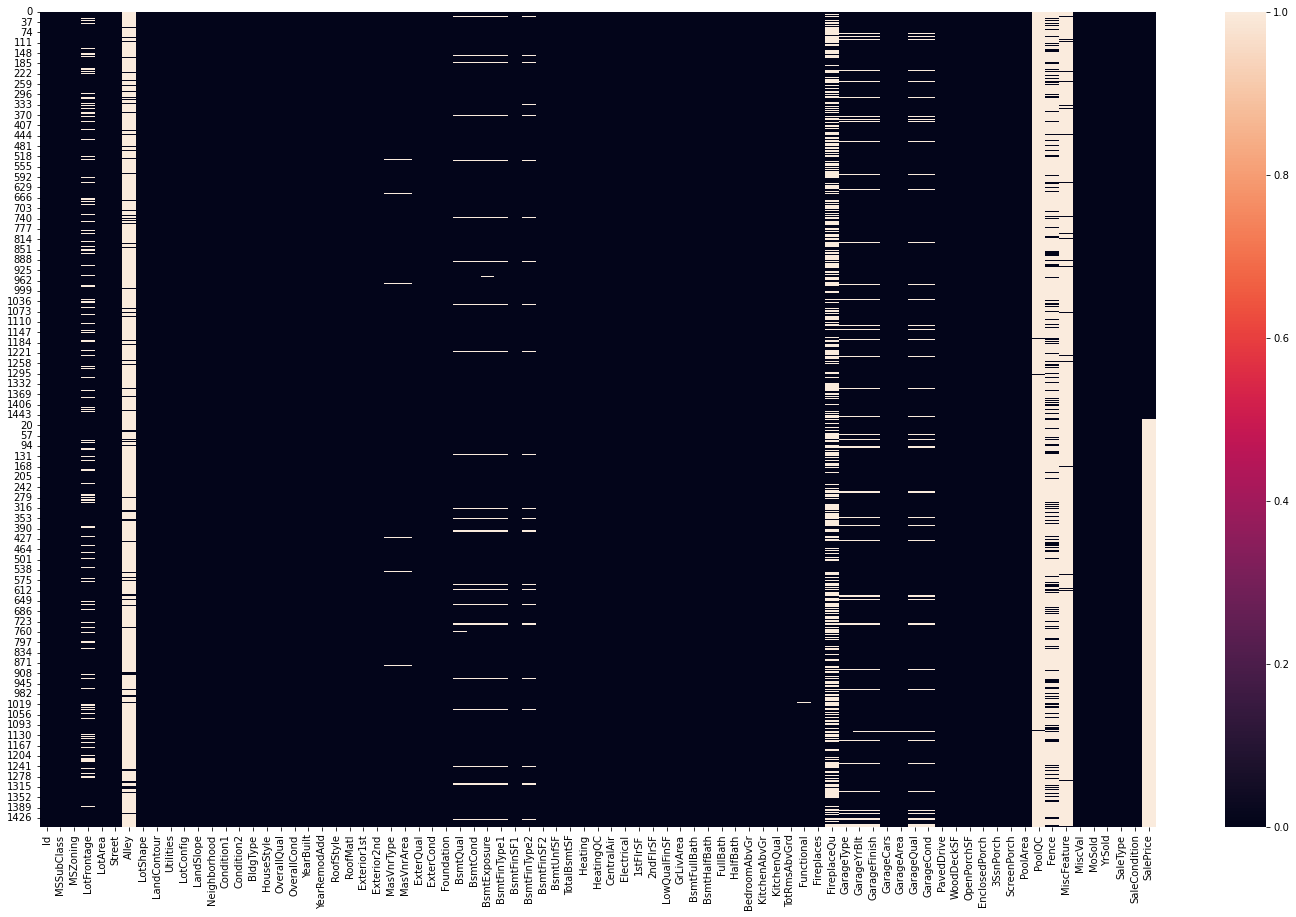

In [16]:
plt.figure(figsize=(25,15))
sns.heatmap(df.isnull())
plt.savefig('D:\python\house-prices-advanced-regression-techniques\missing_values_heatmap.png')

In [17]:
missing_value_50perc=missing_value_percent[(missing_value_percent>50)]
missing_value_50perc

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [18]:
missing_value_20perc=missing_value_percent[(missing_value_percent>20) & (missing_value_percent<51)]
missing_value_20perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [19]:
missing_value_5perc=missing_value_percent[(missing_value_percent>5) & (missing_value_percent<21)]
missing_value_5perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

<AxesSubplot:>

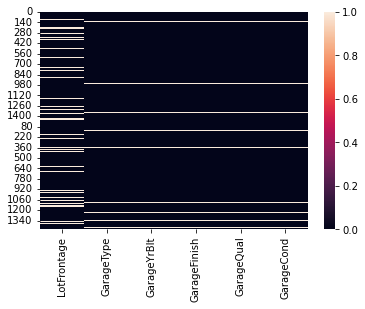

In [20]:
sns.heatmap(df[missing_value_5perc.keys()].isnull())

In [21]:
missing_val_features = missing_value_percent[missing_value_percent>0]
print('Numbe of missing value features :',len(missing_val_features))

Numbe of missing value features : 35


In [22]:
missing_val_features

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [23]:
cat_na_feat = missing_val_features[missing_val_features.keys().isin(cat_features)]
print('No of categorical features:',len(cat_na_feat))

No of categorical features: 23


In [24]:
float_na_features = missing_val_features[missing_val_features.keys().isin(float_features)]
print('No of categorical features:',len(float_features))

No of categorical features: 12


In [25]:
int_na_features = missing_val_features[missing_val_features.keys().isin(int_features)]
print('No of categorical features:',len(int_features))

No of categorical features: 26


In [26]:
float_na_features

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [27]:
cat_na_feat

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [28]:
df=df.set_index(['Id'])

In [29]:
df_mvi=df.copy()
df_mvi.shape

(2919, 80)

In [30]:
mszoning_mode=df_mvi['MSZoning'].mode()[0]
df_mvi['MSZoning'].replace(np.nan,mszoning_mode,inplace=True)
df_mvi['MSZoning'].isnull().sum()

0

In [31]:
def Oldnew_Countplot(feature):
    plt.figure(figsize=(9,5))
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title('Old Data Distribution')
    plt.subplot(122)
    sns.countplot(df_mvi[feature])
    plt.title('New Data Distribution')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


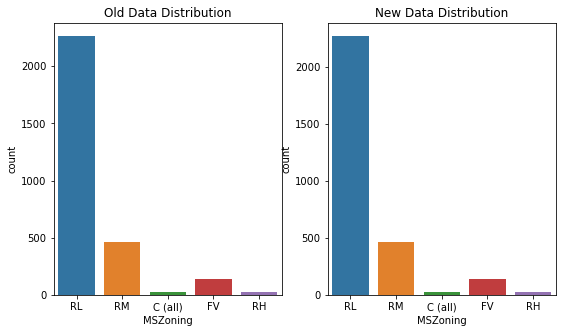

In [32]:
Oldnew_Countplot('MSZoning')

In [33]:
alley_cont = 'NA'
df_mvi['Alley'].replace(np.nan,alley_cont,inplace=True)
df_mvi['Alley'].isnull().sum()

0

In [34]:
def BoxDistPlot(feature):
    plt.figure(figsize=(16,9))
    plt.subplot(121)
    sns.boxplot(feature)
    plt.subplot(122)
    sns.distplot(feature)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


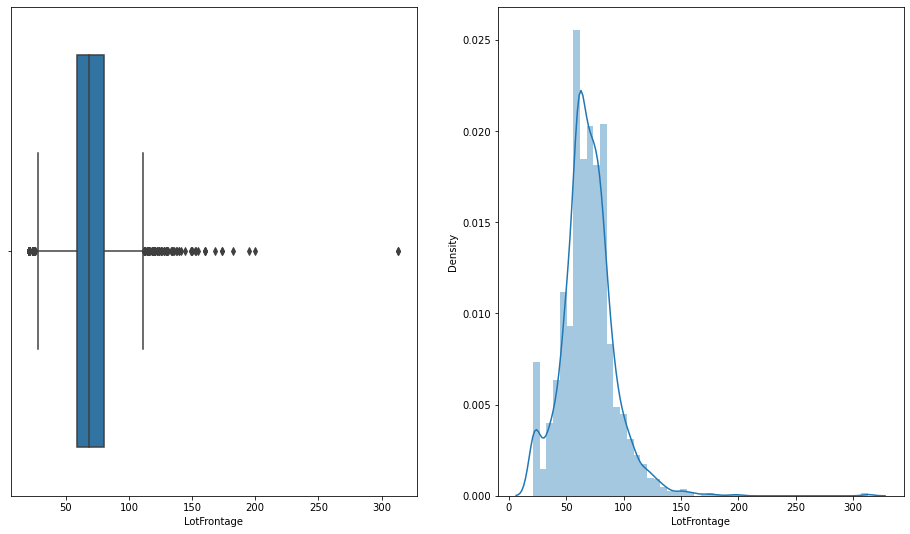

In [35]:
BoxDistPlot(df_mvi['LotFrontage'])

In [36]:
lotfrontage_mean = df_mvi['LotFrontage'].mean()
df_mvi['LotFrontage'].replace(np.nan,lotfrontage_mean,inplace=True)
df_mvi['LotFrontage'].isnull().sum()

0

In [37]:
def Oldnew_Countplot(feature):
    plt.figure(figsize=(16,9))
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title('Old Data Distribution')
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title('Old Data Distribution')
    plt.subplot(223)
    sns.boxplot(df_mvi[feature])
    plt.subplot(224)
    sns.distplot(df_mvi[feature])
    

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.wa

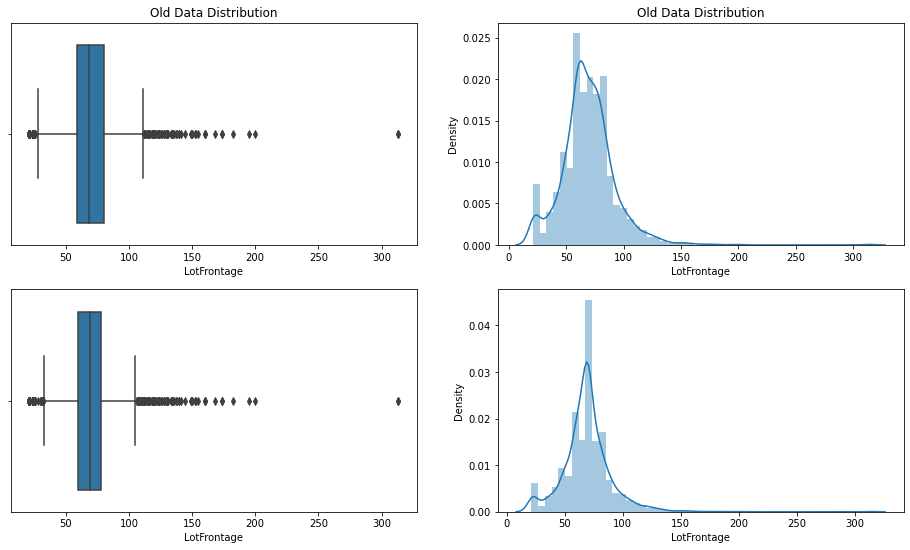

In [38]:
Oldnew_Countplot('LotFrontage')

In [39]:
utilities_mode = df['Utilities'].mode()[0]
df['Utilities'].replace(np.nan,utilities_mode,inplace=True)
df['Utilities'].isnull().sum()

0

In [40]:
missing_val_features

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [41]:
exterior1st_mode=df['Exterior1st'].mode()[0]
exterior2nd_mode=df['Exterior2nd'].mode()[0]
df_mvi['Exterior1st'].replace(np.nan,exterior1st_mode,inplace=True)
df_mvi['Exterior2nd'].replace(np.nan,exterior2nd_mode,inplace=True)
print('null value in exterior1st:',df['Exterior1st'].isnull().sum())
print('null value in exterior2nd:',df['Exterior2nd'].isnull().sum())



null value in exterior1st: 1
null value in exterior2nd: 1


<AxesSubplot:ylabel='Id'>

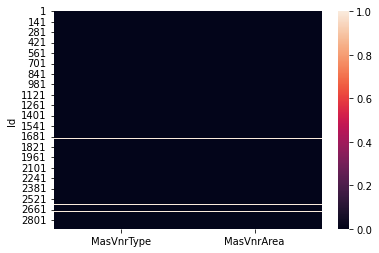

In [42]:
sns.heatmap(df_mvi[['MasVnrType','MasVnrArea']].isnull())

In [43]:
df_mvi[df_mvi[['MasVnrType','MasVnrArea']].isnull().any(axis=1)]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
235           60       RL    69.305795     7851   Pave    NA      Reg   
530           20       RL    69.305795    32668   Pave    NA      IR1   
651           60       FV    65.000000     8125   Pave    NA      Reg   
937           20       RL    67.000000    10083   Pave    NA      Reg   
974           20       FV    95.000000    11639   Pave    NA      Reg   
978          120       FV    35.000000     4274   Pave  Pave      IR1   
1244          20       RL   107.000000    13891   Pave    NA      Reg   
1279          60       RL    75.000000     9473   Pave    NA      Reg   
1692          60       RL    69.305795    12891   Pave    NA      IR1   
1707          20       FV    90.000000     7993   Pave    NA      IR1   
1883          60       RL    70.000000     8749   Pave    NA      Reg   
1993          60       RL    69.305795     7750   Pave    NA      Reg   
2005          20       RL    87.000000    10037   Pave    NA      Reg   
2042          60       FV    69.305795     7500   Pave    NA      Reg   
2312          60       RL    59.000000    15810   Pave    NA      IR1   
2326          80       RL    69.305795    11950   Pave    NA      IR1   
2341          20       RL    85.000000     9965   Pave    NA      Reg   
2350          60       FV   112.000000    12217   Pave    NA      IR1   
2369         120       FV    30.000000     5330   Pave  Pave      IR2   
2593          20       RL    68.000000     8298   Pave    NA      IR1   
2611          20       RL   124.000000    27697   Pave    NA      Reg   
2658          60       RL   103.000000    12867   Pave    NA      IR1   
2687          20       RL    49.000000    15218   Pave    NA      IR1   
2863          20       RL    75.000000     8050   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
235          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
530          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
651          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
937          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
974          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
978          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1244         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1279         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1692         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
1707         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1883         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1993         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
2005         Lvl    AllPub    Corner       Gtl      Somerst      Feedr   
2042         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2312         Lvl    AllPub    Inside       Gtl      Gilbert       RRAn   
2326         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
2341         Lvl    AllPub       FR2       Gtl      Somerst      Feedr   
2350         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2369         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2593         HLS    AllPub    Inside       Gtl       Timber       Norm   
2611         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2658         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
2687         Lvl    AllPub   CulDSac       Gtl      Somerst       RRAn   
2863         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
235        Norm     1Fam     2

In [44]:
masvnrtype_cont='NA'
df_mvi['MasVnrType'].replace(np.nan,masvnrtype_cont,inplace=True)

masvnrarea_cont=0
df_mvi['MasVnrArea'].replace(np.nan,masvnrarea_cont,inplace=True)

print('Null Value in MasVnrType:',df['MasVnrType'].isnull().sum())
print('Null Value in MasVnrArea:',df['MasVnrArea'].isnull().sum())

Null Value in MasVnrType: 24
Null Value in MasVnrArea: 23


In [45]:
'''BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.03425



BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517'''

'BsmtQual         2.774923\nBsmtCond         2.809181\nBsmtExposure     2.809181\nBsmtFinType1     2.706406\nBsmtFinSF1       0.034258\nBsmtFinType2     2.740665\nBsmtFinSF2       0.034258\nBsmtUnfSF        0.03425\n\n\n\nBsmtFinSF1       0.034258\nBsmtFinSF2       0.034258\nBsmtUnfSF        0.034258\nTotalBsmtSF      0.034258\nBsmtFullBath     0.068517\nBsmtHalfBath     0.068517'

In [46]:
cat_basement_feat=['BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2']

num_basement_feat=['BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'BsmtFullBath',
'BsmtHalfBath']


In [47]:
for feat in cat_basement_feat:
    print(f'Value count of {feat} is {df[feat].value_counts()}')

Value count of BsmtQual is TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
Value count of BsmtCond is TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Value count of BsmtExposure is No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
Value count of BsmtFinType1 is Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Value count of BsmtFinType2 is Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [48]:
basment_cont='NA'
for feat in cat_basement_feat:
    df_mvi[feat].replace(np.nan,basment_cont,inplace=True)
    
    

In [49]:
df_mvi[cat_basement_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [50]:
df[cat_basement_feat+num_basement_feat][df[cat_basement_feat+num_basement_feat].isnull().any(axis=1)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
Id                                                                          
18        NaN      NaN          NaN          NaN          NaN         0.0   
40        NaN      NaN          NaN          NaN          NaN         0.0   
91        NaN      NaN          NaN          NaN          NaN         0.0   
103       NaN      NaN          NaN          NaN          NaN         0.0   
157       NaN      NaN          NaN          NaN          NaN         0.0   
183       NaN      NaN          NaN          NaN          NaN         0.0   
260       NaN      NaN          NaN          NaN          NaN         0.0   
333        Gd       TA           No          GLQ          NaN      1124.0   
343       NaN      NaN          NaN          NaN          NaN         0.0   
363       NaN      NaN          NaN          NaN          NaN         0.0   
372       NaN      NaN          NaN          NaN          NaN         0.0   
393       NaN      NaN          NaN          NaN          NaN         0.0   
521       NaN      NaN          NaN          NaN          NaN         0.0   
533       NaN      NaN          NaN          NaN          NaN         0.0   
534       NaN      NaN          NaN          NaN          NaN         0.0   
554       NaN      NaN          NaN          NaN          NaN         0.0   
647       NaN      NaN          NaN          NaN          NaN         0.0   
706       NaN      NaN          NaN          NaN          NaN         0.0   
737       NaN      NaN          NaN          NaN          NaN         0.0   
750       NaN      NaN          NaN          NaN          NaN         0.0   
779       NaN      NaN          NaN          NaN          NaN         0.0   
869       NaN      NaN          NaN          NaN          NaN         0.0   
895       NaN      NaN          NaN          NaN          NaN         0.0   
898       NaN      NaN          NaN          NaN          NaN         0.0   
949        Gd       TA          NaN          Unf          Unf         0.0   
985       NaN      NaN          NaN          NaN          NaN         0.0   
1001      NaN      NaN          NaN          NaN          NaN         0.0   
1012      NaN      NaN          NaN          NaN          NaN         0.0   
1036      NaN      NaN          NaN          NaN          NaN         0.0   
1046      NaN      NaN          NaN          NaN          NaN         0.0   
1049      NaN      NaN          NaN          NaN          NaN         0.0   
1050      NaN      NaN          NaN          NaN          NaN         0.0   
1091      NaN      NaN          NaN          NaN          NaN         0.0   
1180      NaN      NaN          NaN          NaN          NaN         0.0   
1217      NaN      NaN          NaN          NaN          NaN         0.0   
1219      NaN      NaN          NaN          NaN          NaN         0.0   
1233      NaN      NaN          NaN          NaN          NaN         0.0   
1322      NaN      NaN          NaN          NaN          NaN         0.0   
1413      NaN      NaN          NaN          NaN          NaN         0.0   
1488       Gd       TA          NaN          Unf          Unf         0.0   
1586      NaN      NaN          NaN          NaN          NaN         0.0   
1594      NaN      NaN          NaN          NaN          NaN         0.0   
1730      NaN      NaN          NaN          NaN          NaN         0.0   
1779      NaN      NaN          NaN          NaN          NaN         0.0   
1815      NaN      NaN          NaN          NaN          NaN         0.0   
1848      NaN      NaN          NaN          NaN          NaN         0.0   
1849      NaN      NaN          NaN          NaN          NaN         0.0   
1857      NaN      NaN          NaN          NaN          NaN         0.0   
1858      NaN      NaN          NaN          NaN          NaN         0.0   
1859      NaN      NaN          NaN          NaN          NaN         0.0   
1

In [51]:
basment_num=0
for feat in num_basement_feat:
    df_mvi[feat].replace(np.nan,basment_num,inplace=True)

In [52]:
df_mvi[num_basement_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [53]:
df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [54]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [55]:
df_ekk=df[['Electrical','KitchenQual','KitchenAbvGr']]
df_ekk[df_ekk.isnull().any(axis=1)]

Electrical KitchenQual  KitchenAbvGr
Id                                       
1380        NaN          Gd             1
1556      SBrkr         NaN             1

In [56]:
electrical_mode = df['Electrical'].mode()[0]
df['Electrical'].replace(np.nan,electrical_mode,inplace=True)
df['Electrical'].isnull().sum()

0

In [57]:
kitchenqual_mode = df['KitchenQual'].mode()[0]
df['KitchenQual'].replace(np.nan,kitchenqual_mode,inplace=True)
df['KitchenQual'].isnull().sum()

0

In [58]:
'''Functional       0.068517 mode
FireplaceQu     48.646797 NA
PoolQC          99.657417NA
Fence           80.438506NA
MiscFeature     96.402878NA
SaleType         0.034258 mode'''

'Functional       0.068517 mode\nFireplaceQu     48.646797 NA\nPoolQC          99.657417NA\nFence           80.438506NA\nMiscFeature     96.402878NA\nSaleType         0.034258 mode'

In [59]:
functional_mode = df['Functional'].mode()[0]
df['Functional'].replace(np.nan,functional_mode,inplace=True)
df['Functional'].isnull().sum()

0

In [60]:
saletype_mode = df['SaleType'].mode()[0]
df['SaleType'].replace(np.nan,saletype_mode,inplace=True)
df['SaleType'].isnull().sum()

0

In [61]:
fireplacequ_cont='NA'
df_mvi['FireplaceQu'].replace(np.nan,fireplacequ_cont,inplace=True)
df_mvi['FireplaceQu'].isnull().sum()

0

In [62]:
poolqc_cont='NA'
df_mvi['PoolQC'].replace(np.nan,poolqc_cont,inplace=True)
df_mvi['PoolQC'].isnull().sum()

0

In [63]:
fence_cont='NA'
df_mvi['Fence'].replace(np.nan,fence_cont,inplace=True)
df_mvi['Fence'].isnull().sum()

0

In [64]:
miscfeature_cont='NA'
df_mvi['MiscFeature'].replace(np.nan,miscfeature_cont,inplace=True)
df_mvi['MiscFeature'].isnull().sum()

0

In [65]:
'''GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258


GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071'''

'GarageYrBlt      5.447071\nGarageCars       0.034258\nGarageArea       0.034258\n\n\nGarageType       5.378554\nGarageFinish     5.447071\nGarageQual       5.447071\nGarageCond       5.447071'

In [66]:
df_num_gar=['GarageCars','GarageArea']
df_cat_gar=['GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt']

In [67]:
df_gar=df[df_num_gar+df_cat_gar][df[df_num_gar+df_cat_gar].isnull().any(axis=1)]
df_gar

GarageCars  GarageArea GarageType GarageFinish GarageQual GarageCond  \
Id                                                                           
40           0.0         0.0        NaN          NaN        NaN        NaN   
49           0.0         0.0        NaN          NaN        NaN        NaN   
79           0.0         0.0        NaN          NaN        NaN        NaN   
89           0.0         0.0        NaN          NaN        NaN        NaN   
90           0.0         0.0        NaN          NaN        NaN        NaN   
100          0.0         0.0        NaN          NaN        NaN        NaN   
109          0.0         0.0        NaN          NaN        NaN        NaN   
126          0.0         0.0        NaN          NaN        NaN        NaN   
128          0.0         0.0        NaN          NaN        NaN        NaN   
141          0.0         0.0        NaN          NaN        NaN        NaN   
149          0.0         0.0        NaN          NaN        NaN        NaN   
156          0.0         0.0        NaN          NaN        NaN        NaN   
164          0.0         0.0        NaN          NaN        NaN        NaN   
166          0.0         0.0        NaN          NaN        NaN        NaN   
199          0.0         0.0        NaN          NaN        NaN        NaN   
211          0.0         0.0        NaN          NaN        NaN        NaN   
242          0.0         0.0        NaN          NaN        NaN        NaN   
251          0.0         0.0        NaN          NaN        NaN        NaN   
288          0.0         0.0        NaN          NaN        NaN        NaN   
292          0.0         0.0        NaN          NaN        NaN        NaN   
308          0.0         0.0        NaN          NaN        NaN        NaN   
376          0.0         0.0        NaN          NaN        NaN        NaN   
387          0.0         0.0        NaN          NaN        NaN        NaN   
394          0.0         0.0        NaN          NaN        NaN        NaN   
432          0.0         0.0        NaN          NaN        NaN        NaN   
435          0.0         0.0        NaN          NaN        NaN        NaN   
442          0.0         0.0        NaN          NaN        NaN        NaN   
465          0.0         0.0        NaN          NaN        NaN        NaN   
496          0.0         0.0        NaN          NaN        NaN        NaN   
521          0.0         0.0        NaN          NaN        NaN        NaN   
529          0.0         0.0        NaN          NaN        NaN        NaN   
534          0.0         0.0        NaN          NaN        NaN        NaN   
536          0.0         0.0        NaN          NaN        NaN        NaN   
563          0.0         0.0        NaN          NaN        NaN        NaN   
583          0.0         0.0        NaN          NaN        NaN        NaN   
614          0.0         0.0        NaN          NaN        NaN        NaN   
615          0.0         0.0        NaN          NaN        NaN        NaN   
621          0.0         0.0        NaN          NaN        NaN        NaN   
636          0.0         0.0        NaN          NaN        NaN        NaN   
637          0.0         0.0        NaN          NaN        NaN        NaN   
639          0.0         0.0        NaN          NaN        NaN        NaN   
650          0.0         0.0        NaN          NaN        NaN        NaN   
706          0.0         0.0        NaN          NaN        NaN        NaN   
711          0.0         0.0        NaN          NaN        NaN        NaN   
739          0.0         0.0        NaN          NaN        NaN        NaN   
751          0.0         0.0        NaN          NaN        NaN        NaN   
785          0.0         0.0        NaN          NaN        NaN        NaN   
827          0.0         0.0        NaN          NaN        NaN        NaN   
844          0.0         0.0        NaN          NaN        NaN        NaN   
922          0.0         0.0

In [68]:
cat_gar_cont='NA'
for feat in df_cat_gar:
    df_mvi[feat].replace(np.nan,cat_gar_cont,inplace=True)

In [69]:
df_mvi[df_cat_gar].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
GarageYrBlt     0
dtype: int64

In [70]:
num_gar_cont=0
for feat in df_num_gar:
    df_mvi[feat].replace(np.nan,num_gar_cont,inplace=True)

In [71]:
df_mvi[df_num_gar].isnull().sum()

GarageCars    0
GarageArea    0
dtype: int64

In [72]:
df_mvi.isnull().any(axis=1).sum()

1460

In [73]:
for_num_conv=['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
for feat in for_num_conv:
    print(f'{feat} datatype:{df[feat].dtype}')

MSSubClass datatype:int64
YearBuilt datatype:int64
YearRemodAdd datatype:int64
GarageYrBlt datatype:float64
MoSold datatype:int64
YrSold datatype:int64


In [74]:
df[for_num_conv].head()

MSSubClass  YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
Id                                                                  
1           60       2003          2003       2003.0       2    2008
2           20       1976          1976       1976.0       5    2007
3           60       2001          2002       2001.0       9    2008
4           70       1915          1970       1998.0       2    2006
5           60       2000          2000       2000.0      12    2008

In [75]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [76]:
df['MoSold']=df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [77]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [78]:
for feat in for_num_conv:
    df_mvi[feat]=df_mvi[feat].astype(str)

In [79]:
for_num_conv=['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
for feat in for_num_conv:
    print(f'{feat} datatype:{df_mvi[feat].dtype}')

MSSubClass datatype:object
YearBuilt datatype:object
YearRemodAdd datatype:object
GarageYrBlt datatype:object
MoSold datatype:object
YrSold datatype:object


In [80]:
ordinal_enc_var=['ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual',
'GarageCond','PoolQC','Functional','GarageFinish','PavedDrive','Utilities'
]
print('total no of features to convert into ordinal numerical format:',len(ordinal_enc_var))

total no of features to convert into ordinal numerical format: 18


In [81]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [82]:
df['ExterQual']=df['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes

In [83]:
df['ExterQual'].unique()

array([3, 2, 4, 1], dtype=int8)

In [84]:
df['ExterQual'].value_counts()

2    1798
3     979
4     107
1      35
Name: ExterQual, dtype: int64

In [85]:
df_mvi['ExterCond']=df['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['BsmtQual']=df['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['BsmtCond']=df['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['BsmtExposure']=df['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No','Mn','Av','Gd'],ordered=True)).cat.codes
df_mvi['BsmtFinType1']=df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_mvi['BsmtFinType2']=df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_mvi['HeatingQC']=df['HeatingQC'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['KitchenQual']=df['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['FireplaceQu']=df['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['GarageQual']=df['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['GarageCond']=df['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['PoolQC']=df['PoolQC'].astype(CategoricalDtype(categories=['NA','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['Functional']=df['Functional'].astype(CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True)).cat.codes
df_mvi['GarageFinish']=df['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
df_mvi['PavedDrive']=df['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes
df_mvi['Utilities']=df['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSewa','NoSewr','AllPub'],ordered=True)).cat.codes





In [86]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [87]:
df_encod=df_mvi.copy()
object_features=df_encod.select_dtypes(include=['object']).columns.tolist()
object_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [88]:
print('shape before encoding:',df_encod.shape)
df_encod=pd.get_dummies(df_encod,prefix=object_features,columns=object_features,drop_first=True)
print('shape before encoding:',df_encod.shape)


shape before encoding: (2919, 80)
shape before encoding: (2919, 516)


In [89]:
df_encod.head()

LotFrontage  LotArea  Utilities  OverallQual  OverallCond  MasVnrArea  \
Id                                                                          
1          65.0     8450          3            7            5       196.0   
2          80.0     9600          3            6            8         0.0   
3          68.0    11250          3            7            5       162.0   
4          60.0     9550          3            7            5         0.0   
5          84.0    14260          3            8            5       350.0   

    ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
Id                                                                          
1           2         4         3             1             6       706.0   
2           2         4         3             4             5       978.0   
3           2         4         3             2             6       486.0   
4           2         3         4             1             5       216.0   
5           2         4         3             3             6       655.0   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  \
Id                                                                          
1              1         0.0      150.0        856.0          4       856   
2              1         0.0      284.0       1262.0          4      1262   
3              1         0.0      434.0        920.0          4       920   
4              1         0.0      540.0        756.0          3       961   
5              1         0.0      490.0       1145.0          4      1145   

    2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                            
1        854             0       1710           1.0           0.0         2   
2          0             0       1262           0.0           1.0         2   
3        866             0       1786           1.0           0.0         2   
4        756             0       1717           1.0           0.0         1   
5       1053             0       2198           1.0           0.0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Id                                                                    
1          1             3             1            3             8   
2          0             3             1            2             6   
3          1             3             1            3             6   
4          0             3             1            3             7   
5          1             4             1            3             9   

    Functional  Fireplaces  FireplaceQu  GarageFinish  GarageCars  GarageArea  \
Id                                                                              
1            7           0           -1             2         2.0       548.0   
2            7           1            3             2         2.0       460.0   
3            7           1            3             2         2.0       608.0   
4            7           1            4             1         3.0       642.0   
5            7           1            3             2         3.0       836.0   

    GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                
1            3           3           2           0           61   
2            3           3           2         298            0   
3            3           3           2           0           42   
4            3           3           2           0           35   
5            3           3           2         192           84   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  \
Id                                                                     
1               0          0            0         0      -1        0   
2               0          0            0         0      -1        0   
3     

In [90]:
df_encod.select_dtypes(include=['object']).columns.tolist()

[]

In [91]:
len_train = df_train.shape[0]
len_train

1460

In [92]:
X_train = df_encod[:len_train].drop('SalePrice',axis=1)
y_train = df_encod['SalePrice'][:len_train]
X_test = df_encod[len_train:].drop('SalePrice',axis=1)

print('Shape of X_train :',X_train.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of X_test :',X_test.shape)

Shape of X_train : (1460, 515)
Shape of y_train : (1460,)
Shape of X_test : (1459, 515)


In [93]:
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [94]:
X_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [95]:
X_test[:3,:]

array([[ 0.45789401,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.50331075,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.18539358,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [96]:
sc.mean_


array([ 6.99179459e+01,  1.05168281e+04,  2.99726027e+00,  6.09931507e+00,
        5.57534247e+00,  1.03117123e+02,  2.08356164e+00,  3.46369863e+00,
        2.90958904e+00,  1.60410959e+00,  3.52054795e+00,  4.43639726e+02,
        1.22123288e+00,  4.65493151e+01,  5.67240411e+02,  1.05742945e+03,
        3.14520548e+00,  1.16262671e+03,  3.46992466e+02,  5.84452055e+00,
        1.51546370e+03,  4.25342466e-01,  5.75342466e-02,  1.56506849e+00,
        3.82876712e-01,  2.86643836e+00,  1.04657534e+00,  2.51164384e+00,
        6.51780822e+00,  6.84178082e+00,  6.13013699e-01,  1.35273973e+00,
        1.66027397e+00,  1.76712329e+00,  4.72980137e+02,  2.75479452e+00,
        2.75342466e+00,  1.85616438e+00,  9.42445205e+01,  4.66602740e+01,
        2.19541096e+01,  3.40958904e+00,  1.50609589e+01,  2.75890411e+00,
       -9.82191781e-01,  4.34890411e+01,  0.00000000e+00,  4.31506849e-02,
        6.84931507e-03,  2.05479452e-02,  3.67123288e-01,  4.72602740e-02,
        2.73972603e-03,  

In [97]:
#sc.mean_
#sc.n_features_in_
#sc.n_samples_seen_
#sc.scale_
#sc.var_
#sc.with_mean
#sc.with_std

In [98]:
!pip install xgboost

In [99]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [100]:
svr=SVR()
lr= LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
ir=IsotonicRegression()
mlpr=MLPRegressor()
xgb=XGBRegressor()

In [101]:
models = {'a':['SVR',svr],
         'b':['LinearRegression',lr],
         'c':['SGDRegressor',sgdr],
         'd':['KNeighborsRegressor',knr],
         'e':['GaussianProcessRegressor',gr],
         'f':['DecisionTreeRegressor',dtr],
         'g':['GradientBoostingRegressor',gbr],
         'h':['RandomForestRegressor',rfr],
         'i':['IsotonicRegression',ir],
          'j':['MLPRegressor',mlpr],
          'k':['XGBRegressor',xgb]}

In [102]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

def cross_val_func(model,X_train=X_train,y_train=y_train):
    cv=KFold(n_splits=7,random_state=45,shuffle=True)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [103]:
models_score = []
for model in models:
    print('Training Model:',models[model][0])
    score=cross_val_func(models[model][1],X_train,y_train)
    print('Score of Model:',score)
    models_score.append([models[model][0],score[0]])

Training Model: SVR
Score of Model: [-0.05212801203657756]
Training Model: LinearRegression
Score of Model: [-1.9538607718638294e+26]
Training Model: SGDRegressor
Score of Model: [-4931.197810282914]
Training Model: KNeighborsRegressor
Score of Model: [0.5544183079606083]
Training Model: GaussianProcessRegressor
Score of Model: [-5.398614728881502]
Training Model: DecisionTreeRegressor
Score of Model: [0.6445395466082614]
Training Model: GradientBoostingRegressor
Score of Model: [0.8725792079713617]
Training Model: RandomForestRegressor
Score of Model: [0.8456904824035032]
Training Model: IsotonicRegression
Score of Model: [nan]
Training Model: MLPRegressor


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7 fits failed out of a total of 7.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\isotonic.py", line 346, in fit
    X, y = self._build_y(X, y, sample_weight)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\isotonic.py", line 264, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\LENOVO\anaconda3\lib\site

Score of Model: [-4.82864205999969]
Training Model: XGBRegressor
Score of Model: [0.8391794111382389]


In [104]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
parameters = {"n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}
rand_search = RandomizedSearchCV(gbr, param_distributions=parameters,cv=11,n_jobs=-1)
rand_search.fit(X_train, y_train)
rand_search.best_score_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-7.67156745e+19 -2.15724007e+95  7.07540711e-01  8.79518583e-01
  8.78341533e-01  7.01029041e-01  8.30118452e-01  4.66259268e-01
             nan            -inf]
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:978: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


0.879518582987224

In [105]:
gbr=GradientBoostingRegressor(n_estimators=250,max_depth=5,learning_rate=0.1)
cross_val_func(gbr)


[0.8722033898540343]

In [106]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=250)

In [107]:
gbr.score(X_train,y_train)

0.9964610611103165

In [108]:
gbr.fit(X_train,y_train)
y_pred = np.array(gbr.predict(X_train)).round(2)
y_pred

array([202886.34, 179131.08, 213204.19, ..., 266194.57, 140226.02,
       150515.1 ])

In [109]:
df['SalePrice']

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
6       143000.0
7       307000.0
8       200000.0
9       129900.0
10      118000.0
11      129500.0
12      345000.0
13      144000.0
14      279500.0
15      157000.0
16      132000.0
17      149000.0
18       90000.0
19      159000.0
20      139000.0
21      325300.0
22      139400.0
23      230000.0
24      129900.0
25      154000.0
26      256300.0
27      134800.0
28      306000.0
29      207500.0
30       68500.0
31       40000.0
32      149350.0
33      179900.0
34      165500.0
35      277500.0
36      309000.0
37      145000.0
38      153000.0
39      109000.0
40       82000.0
41      160000.0
42      170000.0
43      144000.0
44      130250.0
45      141000.0
46      319900.0
47      239686.0
48      249700.0
49      113000.0
50      127000.0
51      177000.0
52      114500.0
53      110000.0
54      385000.0
55      130000.0
56      180500.0
57      172500.0
58      196500.0
59      438

In [110]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [111]:
columns=[]
for col in df.columns:
    columns.append(col)
print(columns)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [112]:
m1 = pd.DataFrame([df.iloc[0,:]])
m1

MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
1          60       RL         65.0     8450   Pave    NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1       Norm     1Fam     2Story            7            5       2003   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1       196.0          3        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1          GLQ       706.0          Unf         0.0      150.0        856.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1    GasA        Ex          Y      SBrkr       856       854             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1       1710           1.0           0.0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  FireplaceQu  \
1             1          Gd             8        Typ           0          NaN   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
1     Attchd       2003.0          RFn         2.0       548.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1         TA          Y           0           61              0          0   

   ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal MoSold  YrSold  \
1            0         0     NaN    NaN          NaN        0    Feb    2008   

  SaleType SaleCondition  SalePrice  
1       WD        Normal   208500.0

In [113]:
values=[]
for val in m1.iloc[0,:]:
    columns.append(val)
print(values)

[]


In [114]:
m1[columns]

KeyError: "[60, 'RL', 65.0, 8450, 'Pave', nan, 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl', 'CollgCr', 'Norm', '1Fam', '2Story', 7, 5, 2003, 'Gable', 'CompShg', 'VinylSd', 'BrkFace', 196.0, 3, 'TA', 'PConc', 'Gd', 'No', 'GLQ', 706.0, 'Unf', 0.0, 150.0, 856.0, 'GasA', 'Ex', 'Y', 'SBrkr', 854, 1710, 1.0, 2, 8, 'Typ', nan, 'Attchd', 'RFn', 548.0, 61, nan, nan, nan, 'Feb', 2008, 'WD', 'Normal', 208500.0] not in index"

In [137]:
values=[ 60, 'RL', 65.0, 8450, 'Pave', nan, 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl', 'CollgCr', 'Norm', '1Fam', '2Story', 7, 5, 2003, 'Gable', 'CompShg', 'VinylSd', 'BrkFace', 196.0, 'Gd', 'TA', 'PConc', 'No', 'GLQ', 706.0, 'Unf', 0.0, 150.0, 856.0, 'GasA', 'Ex', 'Y', 'SBrkr', 854, 1710, 2, 3, 8, 'Typ', nan, 'Attchd', 'RFn', 548.0, 61, nan, nan, nan, 2008, 'WD', 'Normal', 208500.0, nan, nan, nan, nan, nan]

NameError: name 'nan' is not defined

In [132]:
val_ar=np.array(values)
val_ar

array([], dtype=float64)

In [133]:
res_val_ar=val_ar.reshape(1,-1)
res_val_ar

array([], shape=(1, 0), dtype=float64)

In [134]:
gbr.predict(res_val_ar)

ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

In [135]:
X_train

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [-0.17794032, -0.14781027,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685, -0.08016039,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.23081032, -0.05811155,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [136]:
values

[]